In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image

import pandas as pd

import torch
from torch.utils.data import DataLoader
from preprocessing import *
from experimental_neural_nets import Conv_test, Road_data, UNet
from road_correction import process_roads, f1_loss_numpy

c:\Users\hudrya\anaconda3\lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\hudrya\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\hudrya\anaconda3\lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

In [3]:
root_dir = "data/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(100, len(files))  # Load maximum 100 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

#imgs,gt_imgs = rotate_train_data(imgs,gt_imgs)
#imgs,gt_imgs = flip_train_data(imgs,gt_imgs)

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png


In [ ]:
model = UNet(base_c=4,num_layers=6)

down
(16, 32)
(32, 64)
(64, 128)
(128, 256)
(256, 512)
Up
(512, 256)
(256, 128)
(128, 64)
(64, 32)
(32, 16)


In [ ]:
num_epochs = 10

dataset = Road_data(imgs,gt_imgs)

best_loss = np.inf
best_base = 0
best_n_layer = 0

bases = [2,4,8,16,32]
layers = np.arange(2,7)

for base_c in bases:
    for n_layer in layers:
        model = UNet(base_c=base_c,num_layers=n_layer)
        losses = []
        criterion = torch.nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
        dataloader = DataLoader(dataset, batch_size=5, shuffle=True)
        for epoch in range(num_epochs):
            for batch_idx, (data, target) in enumerate(dataloader):

                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
            losses.append(loss)
            scheduler.step()
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")
        c_loss = min(losses)
        if c_loss < best_loss:
            best_base = base_c
            best_n_layer = n_layer
            best_loss = c_loss

down
(2, 4)
(4, 8)
Up
(8, 4)
(4, 2)
Epoch 1/10, Loss: 0.8514
Epoch 2/10, Loss: 0.8419
Epoch 3/10, Loss: 0.8136
Epoch 4/10, Loss: 0.7885
Epoch 5/10, Loss: 0.7940
Epoch 6/10, Loss: 0.7861
Epoch 7/10, Loss: 0.7840
Epoch 8/10, Loss: 0.7708
Epoch 9/10, Loss: 0.7706
Epoch 10/10, Loss: 0.7271
down
(2, 4)
(4, 8)
(8, 16)
Up
(16, 8)
(8, 4)
(4, 2)
Epoch 1/10, Loss: 0.8646
Epoch 2/10, Loss: 0.8502
Epoch 3/10, Loss: 0.8735
Epoch 4/10, Loss: 0.8508
Epoch 5/10, Loss: 0.8589
Epoch 6/10, Loss: 0.8368
Epoch 7/10, Loss: 0.8356
Epoch 8/10, Loss: 0.8360
Epoch 9/10, Loss: 0.8255
Epoch 10/10, Loss: 0.7983
down
(2, 4)
(4, 8)
(8, 16)
(16, 32)
Up
(32, 16)
(16, 8)
(8, 4)
(4, 2)
Epoch 1/10, Loss: 0.8640
Epoch 2/10, Loss: 0.8346
Epoch 3/10, Loss: 0.8650
Epoch 4/10, Loss: 0.8339
Epoch 5/10, Loss: 0.8162
Epoch 6/10, Loss: 0.8487
Epoch 7/10, Loss: 0.8037
Epoch 8/10, Loss: 0.7896
Epoch 9/10, Loss: 0.8194
Epoch 10/10, Loss: 0.8030
down
(2, 4)
(4, 8)
(8, 16)
(16, 32)
(32, 64)
Up
(64, 32)
(32, 16)
(16, 8)
(8, 4)
(4, 2)
E

In [ ]:
# Copy of output
'''
(2,2)
Epoch 10/10, Loss: 0.7271
(3,2)
Epoch 10/10, Loss: 0.7983
(4,2)
Epoch 6/10, Loss: 0.8487
Epoch 7/10, Loss: 0.8037
Epoch 8/10, Loss: 0.7896
Epoch 9/10, Loss: 0.8194
Epoch 10/10, Loss: 0.8030
(5,2)
Epoch 10/10, Loss: 0.7603
(6,2)
Epoch 7/10, Loss: 0.8367
Epoch 8/10, Loss: 0.8041
Epoch 9/10, Loss: 0.7919
Epoch 10/10, Loss: 0.8159
(2,4)
Epoch 10/10, Loss: 0.7353
(3,4)
Epoch 10/10, Loss: 0.7317
(4,4)
Epoch 7/10, Loss: 0.7212
Epoch 8/10, Loss: 0.7214
Epoch 9/10, Loss: 0.7083
Epoch 10/10, Loss: 0.7170
(5,4)
Epoch 7/10, Loss: 0.7716
Epoch 8/10, Loss: 0.7631
Epoch 9/10, Loss: 0.7285
Epoch 10/10, Loss: 0.7535
(6,4)
Epoch 7/10, Loss: 0.7280
Epoch 8/10, Loss: 0.7524
Epoch 9/10, Loss: 0.7306
Epoch 10/10, Loss: 0.6984
(2,8)
Epoch 10/10, Loss: 0.6975
(3,8)
Epoch 10/10, Loss: 0.7063
(4,8)
Epoch 10/10, Loss: 0.6899
(5,8)
Epoch 7/10, Loss: 0.7355
Epoch 8/10, Loss: 0.7171
Epoch 9/10, Loss: 0.6915
Epoch 10/10, Loss: 0.7085
(6,8)
Epoch 10/10, Loss: 0.6920
down
(2,16)
Epoch 8/10, Loss: 0.6867
Epoch 9/10, Loss: 0.6995
Epoch 10/10, Loss: 0.6900
(3,16)
Epoch 7/10, Loss: 0.6969
Epoch 8/10, Loss: 0.6711
Epoch 9/10, Loss: 0.6747
Epoch 10/10, Loss: 0.6778
(4,16)
Epoch 7/10, Loss: 0.6805
Epoch 8/10, Loss: 0.6782
Epoch 9/10, Loss: 0.6719
Epoch 10/10, Loss: 0.6583
(5,16)
Epoch 6/10, Loss: 0.7078
Epoch 7/10, Loss: 0.7302
Epoch 8/10, Loss: 0.6718
Epoch 9/10, Loss: 0.6683
Epoch 10/10, Loss: 0.6839
(6,16)
Epoch 6/10, Loss: 0.6901
Epoch 7/10, Loss: 0.6790
Epoch 8/10, Loss: 0.6811
Epoch 9/10, Loss: 0.6777
Epoch 10/10, Loss: 0.6808
(2,32)
Epoch 6/10, Loss: 0.6958
Epoch 7/10, Loss: 0.6868
Epoch 8/10, Loss: 0.7193
Epoch 9/10, Loss: 0.6966
Epoch 10/10, Loss: 0.6718
(3,32)
Epoch 6/10, Loss: 0.7020
Epoch 7/10, Loss: 0.6866
Epoch 8/10, Loss: 0.6826
Epoch 9/10, Loss: 0.6949
Epoch 10/10, Loss: 0.6761
(4,32)
Epoch 7/10, Loss: 0.6746
Epoch 8/10, Loss: 0.6920
Epoch 9/10, Loss: 0.6757
Epoch 10/10, Loss: 0.6643
(5,32)
Epoch 6/10, Loss: 0.7046
Epoch 7/10, Loss: 0.6784
Epoch 8/10, Loss: 0.6763
Epoch 9/10, Loss: 0.6922
Epoch 10/10, Loss: 0.6798
(6,32)
Epoch 1/10, Loss: 0.7677'''
# Crash at the end

batch index : 0
batch index : 1
batch index : 2
batch index : 3
batch index : 4


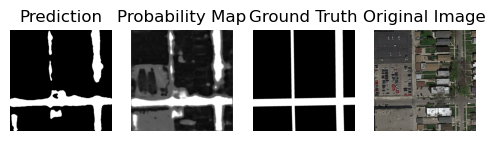

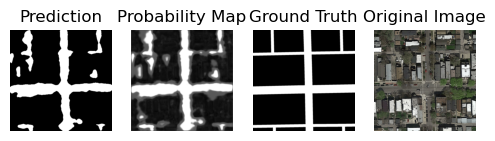

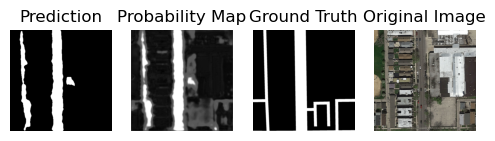

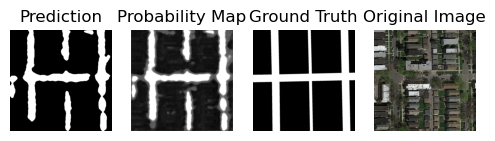

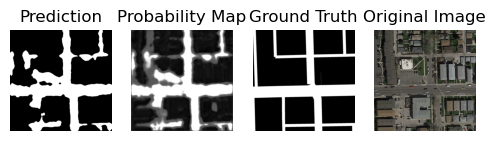

In [6]:
dataset_check = Road_data(imgs, gt_imgs)
dataloader = DataLoader(dataset_check, batch_size=20, shuffle=True)

best_t = 0
best_outlier_size = 0
best_shape_size = 0
best_loss = np.inf

for batch_idx, (data, target) in enumerate(dataloader):
    print(f'batch index : {batch_idx}')
    gt = target
    images = data
    pred = model(data)

    gt_np = gt.detach().cpu().numpy()
    pred_np = pred.detach().cpu().numpy()

    for threshold in np.linspace(0.4, 0.6, 10):
        for outlier_size in np.arange(10, 100, 10):
            for shape_size in np.arange(3, 10):

                test_pred = np.array([
                    process_roads(raw_map=raw_map, threshold=threshold, outlier_size=outlier_size, shape_size=shape_size) 
                    for raw_map in pred_np
                ])
                c_loss = f1_loss_numpy(test_pred, gt_np)
            
                if c_loss < best_loss:
                    best_loss = c_loss
                    best_t = threshold
                    best_outlier_size = outlier_size
                    best_shape_size = shape_size

n_example = 5

# get examples from last batch
for i in range(min(n_example,len(pred_np))):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 6))
    prediction = process_roads(raw_map=pred_np[i], threshold=best_t, outlier_size=best_outlier_size, shape_size=best_shape_size)
    axes[0].imshow(prediction, cmap='gray')
    axes[0].set_title("Prediction")
    
    axes[1].imshow(pred_np[i], cmap='gray')
    axes[1].set_title("Probability Map")

    axes[2].imshow(gt[i], cmap='gray')
    axes[2].set_title("Ground Truth")

    img_np = images[i].permute(1, 2, 0).cpu().numpy() 

    axes[3].imshow(img_np)
    axes[3].set_title("Original Image")

    axes[0].axis("off")
    axes[1].axis("off")
    axes[2].axis("off")
    axes[3].axis("off")

    plt.show()

In [7]:
# best_shape_size = 8
# best_outlier_size = 80
# best_threshold = 0.45 - 0.50